# Quantum Teleportation 

Quantum teleportation is an intriguing application of quantum mechanics that allows the transfer of quantum information between two spatially separated qubits without physically moving the qubits themselves. It is based on the principles of entanglement, superposition, and measurement, and is a fundamental building block for many quantum communication and computation protocols.


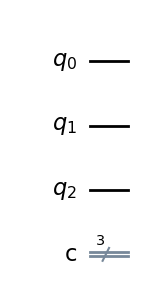

In [3]:
from qiskit import *

circuit = QuantumCircuit(3, 3)
circuit.draw(output='mpl')


## Apply X Gate

The Pauli X gate is a fundamental quantum gate that acts on a single qubit, and it performs a bit-flip operation on the qubit state, changing the state from $\left|0\right\rangle$ to $\left|1\right\rangle$ and vice versa. In other words, it rotates the qubit state vector around the X-axis of the Bloch sphere by 180 degrees.

The Pauli X gate can be represented in matrix form as


$$ X =
\begin{pmatrix}
    0 & 1 \\
    1 & 0
\end{pmatrix}
$$

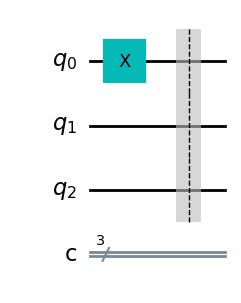

In [4]:
circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

## Apply Hadamard Gate

A Hadamard gate is a fundamental quantum gate that acts on a single qubit, and it performs a superposition operation on the qubit state, creating an equal probability amplitude for the $\left|0\right\rangle$ and $\left|1\right\rangle$ states. In other words, it rotates the qubit state vector around the X+Z axis of the Bloch sphere by 90 degrees. The Hadamard gate is often used as the first step in creating entangled states, and it is a crucial building block for many quantum algorithms. 

Here it will be used to entangle qubit 1 with qubit 2.

The Hadamard gate creates a superposition of states, so if we apply it to the first qubit in the circuit, it will create a state that is equally likely to be measured as $\left|0\right\rangle$ or $\left|1\right\rangle$. The controlled-not (CNOT) gate, or CX gate, is a two-qubit gate that flips the second qubit's value (target qubit) if the first qubit (control qubit) is in the $\left|1\right\rangle$ state.

When we apply the Hadamard gate to the first qubit and then the CX gate with the first qubit as the control and the second qubit as the target, the result is an entangled state of the form:

$$
\frac{1}{\sqrt{2}}\left(\left|00\right\rangle + \left|11\right\rangle\right)
$$


In this entangled state, the two qubits are correlated in such a way that their states are not independent, and measuring the state of one qubit will immediately determine the state of the other qubit, regardless of the distance between them. Thus, applying a Hadamard gate followed by a CX gate creates a maximally entangled two-qubit state, which is a crucial resource in many quantum algorithms and protocols.

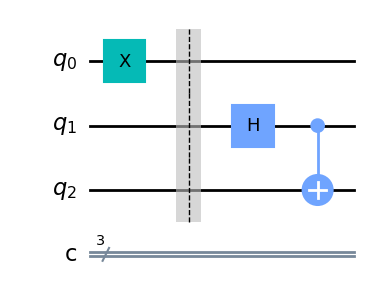

In [5]:
circuit.h(1)
circuit.cx(1, 2)
circuit.draw(output='mpl')

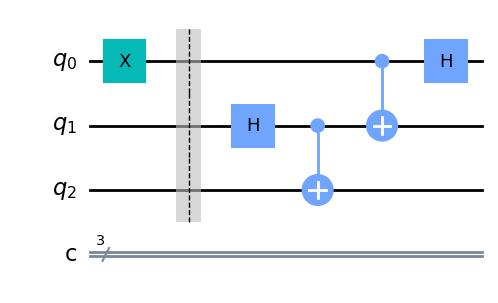

In [6]:
circuit.cx(0, 1)
circuit.h(0)
circuit.draw(output='mpl')

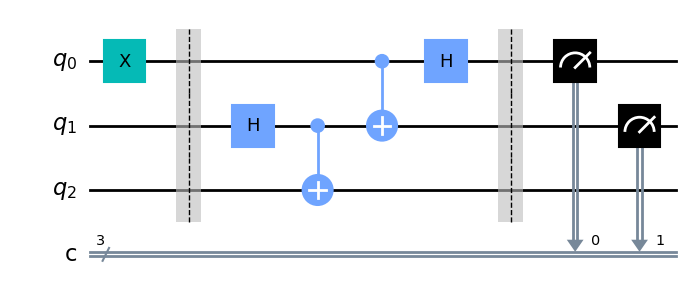

In [7]:
circuit.barrier()
circuit.measure([0, 1], [0, 1]) # measure qubits 0,1 and assign them to classical bits 0,1
circuit.draw(output='mpl')


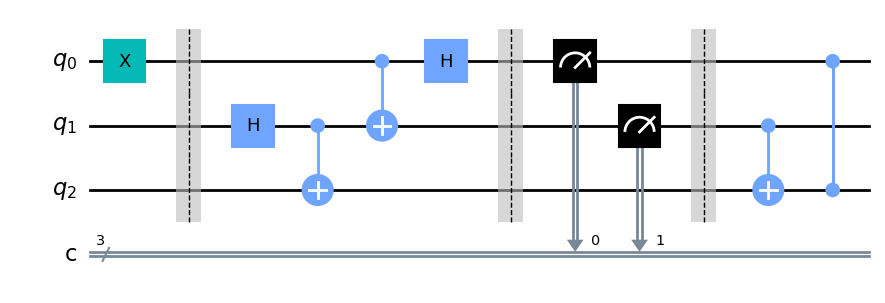

In [8]:
circuit.barrier()
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw(output='mpl')

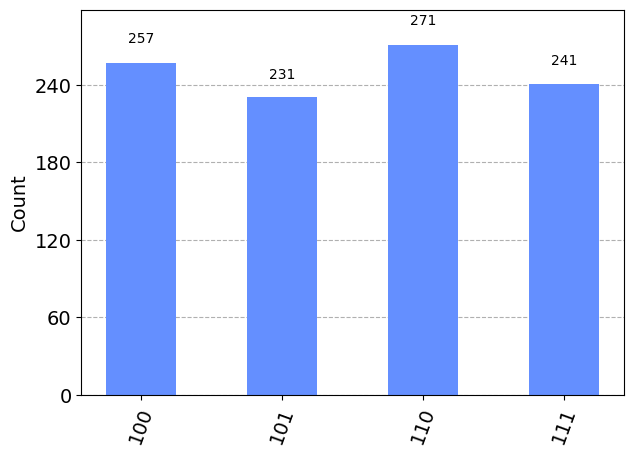

In [19]:
circuit.measure(2, 2)
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots=1000).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

At the end of the X gate, qubit 0 is now in state $\left\lvert1\right\rangle$. Through quantum teleportation, this value has been assigned to qubit 2.

This is shown in the histogram above. With the x labels read as [c2, c1, c0], it can be seen that only results with c2=1 exist.